# Flipping a Coin

Given some distribution of flips from a coin, say with 3 heads out of 12 flips, with what confidence can we say that the coin is fair? Here we investigate this using Bayes theorem,

$$p \ ( \ H \ | \ D, I) = \frac{p \ (D \ | \ H, I) \ p \ (H \ | \ I)}{p \ (D \ | \ I)}$$

In [50]:
import numpy as np
import pandas as pd

rands = np.random.uniform (low=0, high=1, size=4096)

bias = 0.4
convert_ht = lambda val: 'T' if val < bias else 'H'
ht_map = np.vectorize (convert_ht)

flips = ht_map (rands)

In [51]:
flips = pd.Series (flips)

In [55]:
flips.describe()

count     4096
unique       2
top          H
freq      2444
dtype: object

In [38]:
seq = [0,1,2,3]
seq.extend(2**a for a in range (2,13))

In [39]:
seq

[0, 1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

In [58]:
def posterior (N, R, H):
    
    val = H**R * (1-H)**(N-R)
    return val

In [80]:
xval = np.linspace (start = 0, stop = 1, num = 100)

In [81]:
post_dist = [posterior (10, 5, xval[a]) for a in range (0, xval.size)]

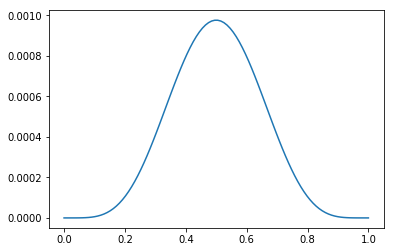

In [82]:
plt.plot (xval, post_dist)
plt.show()

# Appendix

## Binomial Distribution

A binomial distribution is a discrete probability distribution used to show the distribution of successes in a sequence of independent Bernoulli trials. The probability mass function is given by:

$$ p = \binom{N}{R} H^R (1 - H)^{N-R}$$

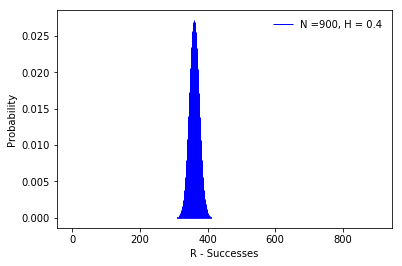

In [15]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 900, 0.4

x = np.arange(binom.ppf(0.00, n, p), binom.ppf(1.0, n, p))

glab = 'N =' + str(n) + ', H = ' + str (p)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='b', linestyles='-', lw=1, label=glab)
ax.legend(loc='best', frameon=False)
plt.ylabel('Probability')
plt.xlabel('R - Successes')
plt.show()